In [1]:
K = 1.0e-04
A = 75
dhdl= 0.01
n = 0.20

In [2]:
q=K*dhdl
print("discharge velocity = ",round(q,6)," cm/sec")

discharge velocity =  1e-06  cm/sec


In [3]:
u=q/n
print("seepage velocity = ",round(u,6)," cm/sec")

seepage velocity =  5e-06  cm/sec


In [4]:
Q=q*A
print("Volumetric discharge = ",round(Q,6)," ml/sec")

Volumetric discharge =  7.5e-05  ml/sec


In [5]:
# sketch(s) 
# list known quantities
# list unknown quantities
# governing principles
# solution details (e.g. step-by-step computations)
# discussion

In [6]:
# Find total discharge per unit area through entire formation
htop=33
hbot=21
k1=0.0002
k2=0.000005
k3=0.001
l1=50
l2=20
l3=210
n1=0.30
n2=0.42
n3=0.35
Kbar=(l1+l2+l3)/((l1/k1) + (l2/k2) + (l3/k3))
print("vertical composite Kv: ",round(Kbar,6)," ft/sec")
dH=htop - hbot
dl = l1+l2+l3
qt=Kbar*dH/dl
print("vertical hydraulic gradient :",round(dH/dl,6)," ft/ft")
print("vertical specific discharge q: ",round(qt,6)," ft/sec")

vertical composite Kv:  6.3e-05  ft/sec
vertical hydraulic gradient : 0.042857  ft/ft
vertical specific discharge q:  3e-06  ft/sec


In [7]:
# find head loss in layer 1
dh1 = l1*qt/k1
h12 = htop -dh1
print("head at layer 1-2 interface :",round(h12,2)," ft ")

head at layer 1-2 interface : 32.33  ft 


In [8]:
# find head loss in layer 2
dh2 = l2*qt/k2
h23 = htop - dh1 -dh2
print("head at layer 2-3 interface :",round(h23,2)," ft ")

head at layer 2-3 interface : 21.57  ft 


In [9]:
# time in layer 1
time1 = l1*n1/qt
print("tracer time in layer 1 :",round(time1,6)," sec")

tracer time in layer 1 : 5575000.0  sec


In [10]:
# time in layer 2
time2 = l2*n2/qt
print("tracer time in layer 2 :",round(time2,6)," sec")

tracer time in layer 2 : 3122000.0  sec


In [11]:
# time in layer 3
time3 = l3*n3/qt
print("tracer time in layer 3 :",round(time3,6)," sec")

tracer time in layer 3 : 27317500.0  sec


In [12]:
totaltime=time1+time2+time3
totaltime=totaltime/86400
print("Tracer travel time :",round(totaltime,3)," days ")

Tracer travel time : 416.834  days 


In [13]:
# sketch(s) 
# list known quantities
# list unknown quantities
# governing principles
# solution details (e.g. step-by-step computations)
# discussion

x-component hydraulic gradient: 

 -0.012
y-component hydraulic gradient:  0.005
magnitude hydraulic gradient:  0.014
direction cosine x-component hydraulic gradient:  -0.92
direction cosine y-component hydraulic gradient:  0.392
magnitude head gradient:  23.103  meters per day
u= -K*dH/dx:  -21.25 m/day
v= -K*dH/dy:  9.067 m/day


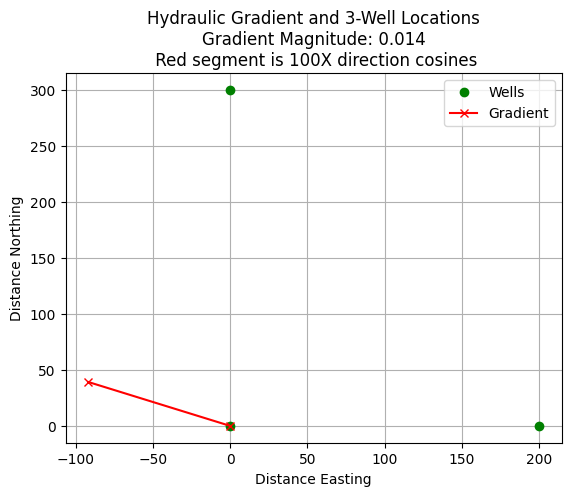

In [14]:
import numpy
import math
Tran=1700.0
# well A is origin
wellID =['Well A','Well B','Well C']
well_X =[0.0,0.0,200.0]
well_Y =[0.0,300.0,0.0]
well_Z =[120,118.4,122.5]
amatrix = [[0 for j in range(3)]for i in range(3)]
b = [0 for j in range(3)]
# A-matrix
for i in range(3):
    amatrix[i][0]=well_X[i]
    amatrix[i][1]=well_Y[i]
    amatrix[i][2]=1.0
    b[i]= well_Z[i] 
amatrix = numpy.array(amatrix) #typecast as numpy array
b = numpy.array(b)
x = numpy.linalg.solve(amatrix,b) # solve equation of plane
# recover and report results
print("x-component hydraulic gradient: ",round(-x[0],3))
print("y-component hydraulic gradient: ",round(-x[1],3))
grad = math.sqrt(x[0]**2+x[1]**2)
print("magnitude hydraulic gradient: ",round(grad,3))
print("direction cosine x-component hydraulic gradient: ",round(-x[0]/grad,3))
print("direction cosine y-component hydraulic gradient: ",round(-x[1]/grad,3))
gradH = grad*Tran
print("magnitude head gradient: ",round(gradH,3)," meters per day")
print("u= -K*dH/dx: ",round(-x[0]*Tran,3),"m/day")
print("v= -K*dH/dy: ",round(-x[1]*Tran,3),"m/day")
# use this if want to plot
list1 = [0,-100*(x[0]/grad)] 
list2 = [0,-100*(x[1]/grad)] 
stry='Distance Northing'
strx='Distance Easting'
strtitle='Hydraulic Gradient and 3-Well Locations\n'+'Gradient Magnitude: '+ str(round(grad,3)) +'\n Red segment is 100X direction cosines' 

plotlabel=['Wells','Gradient']
from matplotlib import pyplot as plt # import the plotting library from matplotlibplt.show()
plt.plot(well_X, well_Y, color ='green', marker ='o', linestyle ='none') # create a line chart, years on x-axis, gdp on y-axis
plt.plot(list1, list2, color ='red', marker ='x', linestyle ='solid')
plt.title(strtitle)# add a title
plt.ylabel(stry)# add a label to the x and y-axes
plt.xlabel(strx)
plt.legend(plotlabel)
plt.grid()
plt.show() # display the plot

In [15]:
# build XYZ structure from 3-well function
nrows=401
ncols=301
distancex=[0 for i in range(ncols)]
distancey=[0 for i in range(nrows)]
head=[[0 for j in range(ncols)] for i in range(nrows)]
for j in range(ncols):
    distancex[j]=float(j)
for i in range(nrows):
    distancey[i]=float(i)
for j in range(ncols):
    for i in range(nrows):
        head[i][j]=x[0]*distancex[j] + x[1]*distancey[i] + x[2]

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

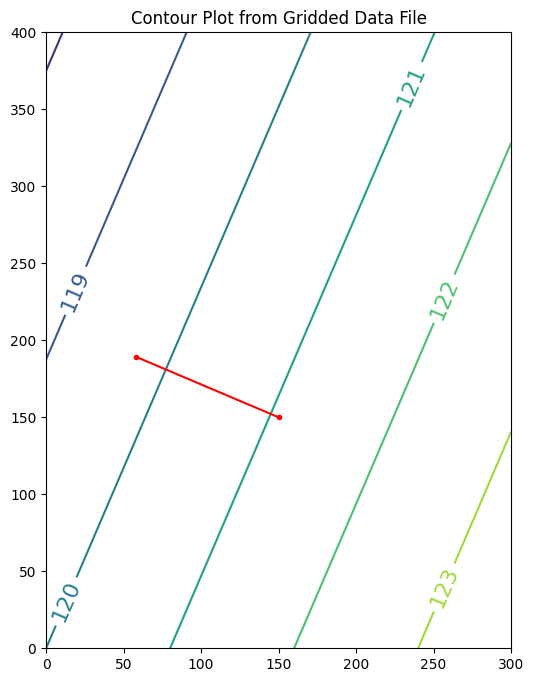

In [16]:
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([distancex[jcol],distancey[irow],head[irow][jcol]])
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 300)
lat = numpy.linspace(min(coord_y), max(coord_y), 80)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(6, 8)
CS = ax.contour(X, Y, Z, levels = 6)
# build flowline to overlaY
list1 = [150,150-100*(x[0]/grad)] 
list2 = [150,150-100*(x[1]/grad)] 
ax.plot(list1, list2, color ='red', marker ='.', linestyle ='solid')
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Contour Plot from Gridded Data File')

In [17]:
# sketch(s) 
# list known quantities
# list unknown quantities
# governing principles
# solution details (e.g. step-by-step computations)
# discussion

x-component hydraulic gradient:  -0.012
y-component hydraulic gradient:  0.005
magnitude hydraulic gradient:  0.014
direction cosine x-component hydraulic gradient:  -0.92
direction cosine y-component hydraulic gradient:  0.392
u= -K*dH/dx:  -0.332 m/day
v= -K*dH/dy:  -0.047 m/day


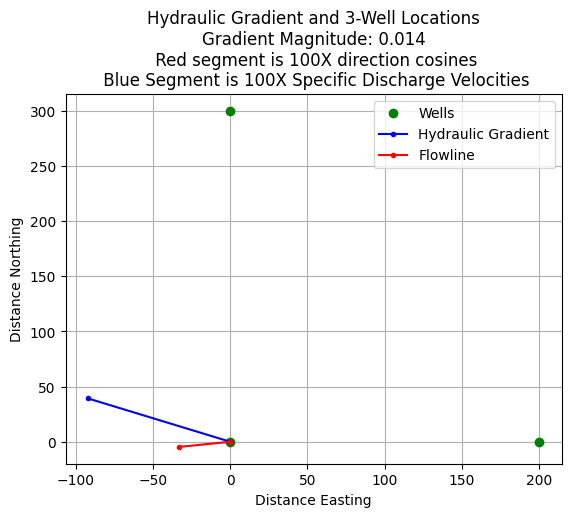

In [18]:
import numpy
import math
K=[[30,8],[8,10]]
# well A is origin
wellID =['Well A','Well B','Well C']
well_X =[0.0,0.0,200.0]
well_Y =[0.0,300.0,0.0]
well_Z =[120,118.4,122.5]
amatrix = [[0 for j in range(3)]for i in range(3)]
b = [0 for j in range(3)]
# A-matrix
for i in range(3):
    amatrix[i][0]=well_X[i]
    amatrix[i][1]=well_Y[i]
    amatrix[i][2]=1.0
    b[i]= well_Z[i] 
amatrix = numpy.array(amatrix) #typecast as numpy array
b = numpy.array(b)
x = numpy.linalg.solve(amatrix,b) # solve equation of plane
# recover and report results
print("x-component hydraulic gradient: ",round(-x[0],3))
print("y-component hydraulic gradient: ",round(-x[1],3))
grad = math.sqrt(x[0]**2+x[1]**2)
print("magnitude hydraulic gradient: ",round(grad,3))
print("direction cosine x-component hydraulic gradient: ",round(-x[0]/grad,3))
print("direction cosine y-component hydraulic gradient: ",round(-x[1]/grad,3))
#gradH = grad*Tran
#print("magnitude head gradient: ",round(gradH,3)," meters per day")
u = -x[0]*K[0][0]-x[1]*K[0][1]
v = -x[0]*K[1][0]-x[1]*K[1][1]
print("u= -K*dH/dx: ",round(u,3),"m/day")
print("v= -K*dH/dy: ",round(v,3),"m/day")
# use this if want to plot
list1 = [0,-100*(x[0]/grad)] 
list2 = [0,-100*(x[1]/grad)] 

list11 = [0,100*(u)] 
list22 = [0,100*(v)] 

stry='Distance Northing'
strx='Distance Easting'
strtitle='Hydraulic Gradient and 3-Well Locations\n' + \
'Gradient Magnitude: '+ str(round(grad,3)) + '\n Red segment is 100X direction cosines' + \
'\n Blue Segment is 100X Specific Discharge Velocities'

plotlabel=['Wells','Hydraulic Gradient','Flowline']
from matplotlib import pyplot as plt # import the plotting library from matplotlibplt.show()
plt.plot(well_X, well_Y, color ='green', marker ='o', linestyle ='none') # create a line chart, years on x-axis, gdp on y-axis
plt.plot(list1, list2, color ='blue', marker ='.', linestyle ='solid')
plt.plot(list11, list22, color ='red', marker ='.', linestyle ='solid')
plt.title(strtitle)# add a title
plt.ylabel(stry)# add a label to the x and y-axes
plt.xlabel(strx)
plt.legend(plotlabel)
plt.grid()
plt.show() # display the plot

In [19]:
# build XYZ structure from 3-well function
nrows=401
ncols=301
distancex=[0 for i in range(ncols)]
distancey=[0 for i in range(nrows)]
head=[[0 for j in range(ncols)] for i in range(nrows)]
for j in range(ncols):
    distancex[j]=float(j)
for i in range(nrows):
    distancey[i]=float(i)
for j in range(ncols):
    for i in range(nrows):
        head[i][j]=x[0]*distancex[j] + x[1]*distancey[i] + x[2]

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

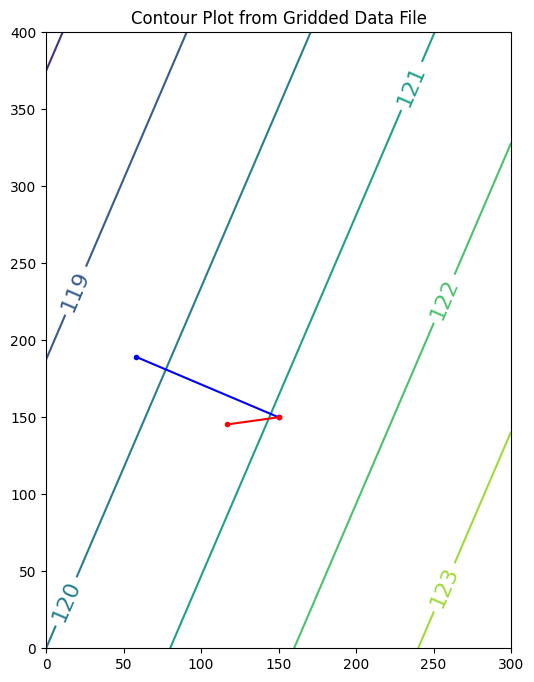

In [20]:
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([distancex[jcol],distancey[irow],head[irow][jcol]])
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 300)
lat = numpy.linspace(min(coord_y), max(coord_y), 80)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(6, 8)
CS = ax.contour(X, Y, Z, levels = 6)
# build flowline to overlaY
list1 = [150,150-100*(x[0]/grad)] 
list2 = [150,150-100*(x[1]/grad)] 
list11 = [150,150+100*(u)] 
list22 = [150,150+100*(v)]
ax.plot(list1, list2, color ='blue', marker ='.', linestyle ='solid')
ax.plot(list11, list22, color ='red', marker ='.', linestyle ='solid')
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Contour Plot from Gridded Data File')